In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import mysql.connector

db=mysql.connector.connect(host='localhost',
                           username='root',
                           password='1234',
                           database='zomato')
cur=db.cursor()

# Total no of Restaurants

In [9]:
query="""select count(restaurant_name) from zomato"""
cur.execute(query)
data=cur.fetchall()
print('The total no of restaurants are',data[0][0])

The total no of restaurants are 6984


# Top 10 Areas by Restaurant

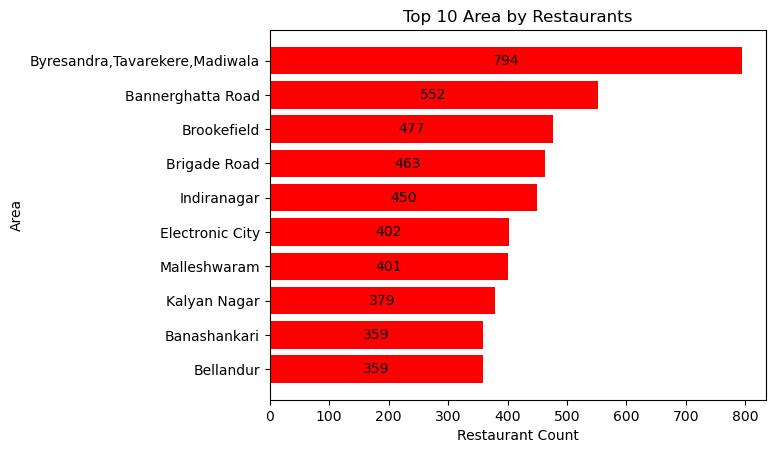

In [65]:
query="""select distinct(area),count(restaurant_name) from zomato
group by area order by count(restaurant_name) desc limit 10"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['Area','Restaurant Count'])
df=df.sort_values(by='Restaurant Count',ascending=True)
barh=plt.barh(df['Area'],df['Restaurant Count'],color='red')
plt.bar_label(barh, labels=df['Restaurant Count'],label_type='center')
plt.title('Top 10 Area by Restaurants')
plt.xlabel('Restaurant Count')
plt.ylabel('Area')
plt.show()

# Online Orders

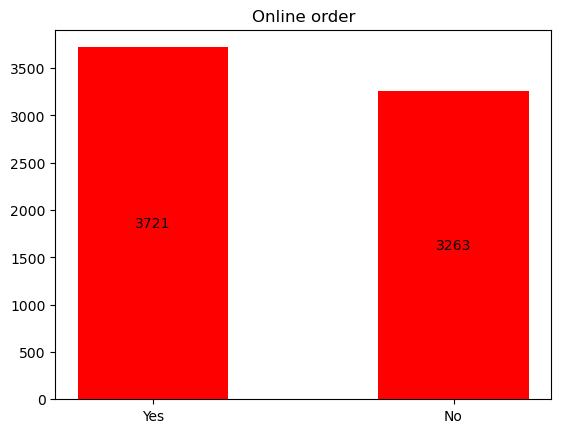

In [81]:
query="""select online_order, count(online_order)
from zomato group by online_order order by online_order desc"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['Boolean','Online order'])
barplot=plt.bar(df['Boolean'],df['Online order'],color='red',width=0.5)
plt.bar_label(barplot, labels=df['Online order'],label_type='center')
plt.title('Online order')
plt.show()

# Average Cost for 2

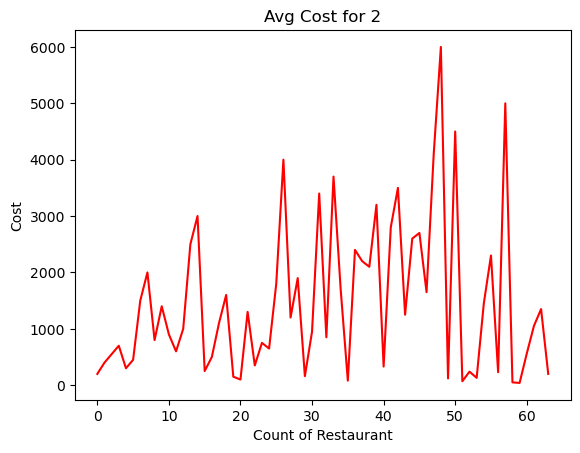

In [108]:
query="""select distinct(avg_cost) from zomato"""
cur.execute(query)
data=cur.fetchall()
xpoint=data
plt.plot(xpoint,color='red')
plt.title('Avg Cost for 2')
plt.xlabel('Count of Restaurant')
plt.ylabel('Cost')
plt.show()

# Top 10 Restaurant by Rating

In [120]:
query="""select restaurant_name, rating,
dense_rank() over(order by rating desc) as rk
from zomato order by rating desc limit 10"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['Restaurant Name','Rating', 'Rank'])
df

,Restaurant Name,Rating,Rank
0,Asia Kitchen By Mainland China,4.9,1
1,Byg Brewski Brewing Company,4.9,1
2,SantÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚ÂƒÃƒ...,4.9,1
3,Belgian Waffle Factory,4.8,2
4,O.G. Variar & Sons,4.8,2
5,Punjab Grill,4.8,2
6,The Pizza Bakery,4.8,2
7,Taaza Thindi,4.7,3
8,TBC Sky Lounge,4.7,3
9,The Big Barbeque,4.7,3


# Top 10 Restaurants by No of Ratings

In [123]:
query="""select restaurant_name,num_of_ratings,
dense_rank() over(order by num_of_ratings desc) as rk
from zomato order by num_of_ratings desc limit 10"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['Restaurant Name','Rating', 'Rank'])
df

,Restaurant Name,Rating,Rank
0,Byg Brewski Brewing Company,16345,1
1,Toit,14956,2
2,The Black Pearl,10413,3
3,Big Pitcher,9272,4
4,Arbor Brewing Company,8375,5
5,Prost Brew Pub,7854,6
6,Church Street Social,7544,7
7,Hoot,7193,8
8,Flechazo,7154,9
9,The Hole in the Wall Cafe,7113,10


# Top 5 Restaurant Types in percentages

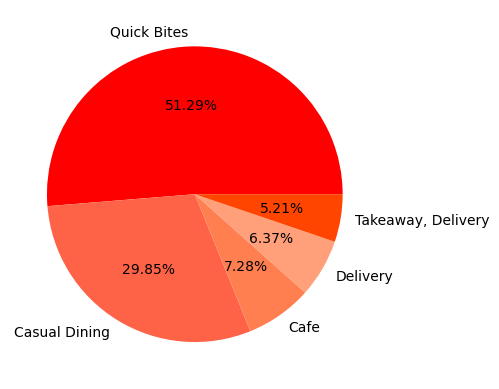

In [142]:
query="""with a as (select restaurant_type,
count(restaurant_type) count_type from zomato
group by restaurant_type order by count_type desc limit 5)
SELECT restaurant_type,count_type, count_type*100/SUM(count_type)
OVER () AS percentage
FROM a ORDER BY count_type DESC"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['Restaurant_Type','Count','Percentage'])
value=df['Percentage']
legend=df['Restaurant_Type']
plt.pie(value,labels=legend,autopct="%2.2f%%",colors=["red","tomato","coral","lightsalmon","orangered","salmon"])
plt.show()